# Frozen Lake

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake.  
Action Space - Discrete(4)  
Observation Space - Discrete(16)  
import gymnasium.make("FrozenLake-v1")  

https://gymnasium.farama.org/environments/toy_text/frozen_lake

## 1. Environment Explore

In [1]:
import gym # import the gym library
import random # import the random library
import numpy as np # import the numpy library

In [2]:
environment = gym.make('FrozenLake-v1', is_slippery=False, render_mode='ansi') # make the environment
environment.reset() # reset the environment

# “S” for Start tile
# “G” for Goal tile
# “F” for frozen tile
# “H” for a tile with a hole


(0, {'prob': 1})

In [3]:
print(environment.render())


SFFF
FHFH
FFFH
HFFG



In [4]:
nb_states = environment.observation_space.n # number of observations # 16
nb_actions = environment.action_space.n # number of actions # 4

# Q-table: states(16) x actions(4)

q_table = np.zeros((nb_states, nb_actions)) # create a q_table with 16 states and 4 actions

In [5]:
# 0: left
# 1: down
# 2: right
# 3: up

action = environment.action_space.sample() # sample a random action

In [6]:
new_state, reward, done, info, _ = environment.step(action) # take the action and get the new state, reward, done, info

In [7]:
new_state, reward, done, info, _

(0, 0.0, False, False, {'prob': 1.0})

## 2. Q-learning

In [8]:
import matplotlib.pyplot as plt
import gym
import random
import numpy as np

In [9]:
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.reset()

(0, {'prob': 1})

In [10]:
#q_table
q_table = np.zeros((environment.observation_space.n, environment.action_space.n))

#hyperparameters
episodes = 1000 # number of episodes
alpha = 0.5 # learning rate
gamma = 0.9 # discount rate

#list of outcomes to plot
outcomes = []

print(f"q_table before training: \n {q_table}")

q_table before training: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [11]:
for _ in range(episodes):

    state , _ = environment.reset() # reset the environment and get the initial state
    done = False
    outcomes.append("Failure")

    while not done:

        # action selection
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])
        else:
            action = environment.action_space.sample()

        # implement action
        new_state, reward, done, info, _ = environment.step(action)

        # update q_table
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])

        # update state
        state = new_state

        if reward:
            outcomes[-1] = ("Success")

print()
print("q_table after training:")
print(q_table)


q_table after training:
[[0.        0.59049   0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.6561    0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.2784375 0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.729     0.       ]
 [0.        0.        0.81      0.       ]
 [0.        0.9       0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.        0.       ]]


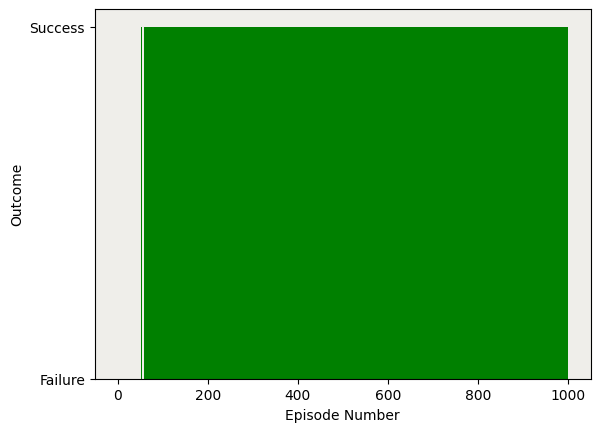

In [12]:
plt.figure()
plt.xlabel("Episode Number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor("#efeeea")
plt.bar(range(len(outcomes)), outcomes, color="green", width=1)
plt.show()

## 3. Evaluation

In [13]:
episodes = 100
nb_success = 0

for _ in range(episodes):
    state, _ = environment.reset()
    done = False

    while not done:

        # choose action
        if np.max(q_table[state]) > 0:
            action = np.argmax(q_table[state])
        else:
            action = environment.action_space.sample()

        # implement action
        new_state, reward, done, info, _ = environment.step(action)

        # update state
        state = new_state

        if reward > 0:
            nb_success += 1

print(f"Success rate: {100*nb_success / episodes}")

Success rate: 100.0
